# The white noise replicator model

The white noise replicator model is stochastic process that generalized the replicator model. The replicator model is a deterministic model for the fraction of species $n=1,...,N$ governed by 

$$\dot x_i = (\mu_i-\phi)x_i$$

where the parameters $\mu_i$ are fitnesses of species $i$ and $\phi=\sum _i \mu_i x_i$ is the population mean fitness and the population is normalized to unity, i.e. $\sum x_i=1$ because the $x_i$ are fractions of the entire population.

The white noise replicator model is related to both, the **Kimura replicator** model and the **Gillespie replicator** model. In it, instead of Gaussian white noise, **colored noise** with non-zero correlation time is considered first, and then the correlation time is sent to zero. This is equivalent to the Stratonovich interpretation of the associated stochastic differential equations.

So, specifically the model is defined as

$$\dot x_i = (\mu_i(t)-\phi)x_i$$

with 

$$\mu_i(t)=\mu_i + \sigma_i Z(t)_i $$

and

$$\tau dZ_i=-Z_i dt+dW_i$$

and one considers the limit $\tau\rightarrow0$ after integration. Using the Gillespie model, one finds the solution:

$$x_i(t)=\frac{1}{1+\sum_{j\neq i} \frac{x_j(0)}{x_i(0)} \exp\left[\left(\mu_j-\mu_i \right) t +\sigma_j W_j(t) -  \sigma_i W_i(t)\right]   }$$

because the integration of $\mu_i(t)$ is the integral of the Ornstein-Uhlenbeck process, in the limit $\tau\rightarrow0$ this is the Wiener process.

For two populations we've got an equivalence to the SDE:

$$dx = x(1-x)\left[\mu_1-\mu_2+\sigma^2(1/2-x))\right]dt +\sigma x(1-x) dW$$

so in other words, this is a Gillespie model where we replaced $\mu_i\rightarrow \mu_i+\sigma_i^2/2$.

In [2]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## n populations with identical parameters

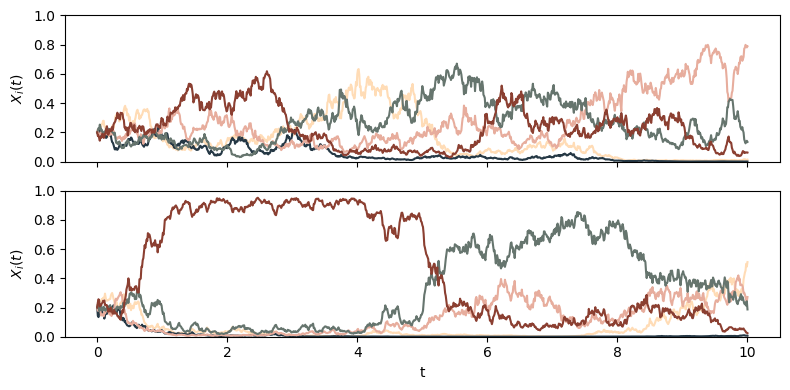

In [3]:
samples = 2
n = 5
mu = np.ones(n)
sigma = np.ones(n)

res = p.white_replicator(10,0.001,N=5,samples=samples,gap=10)
t = res["t"]
X = res["X"]

fig, ax = plt.subplots(samples,1,figsize=[8,4],sharex=True)

for i,x in enumerate(X):
    ax[i].plot(t,x)        
    ax[i].set_ylabel("$X_i(t)$")
    ax[i].set_ylim([0,1])
ax[-1].set_xlabel("t")
plt.tight_layout()
plt.show()

## three populations with different noise terms and identical mean fitness

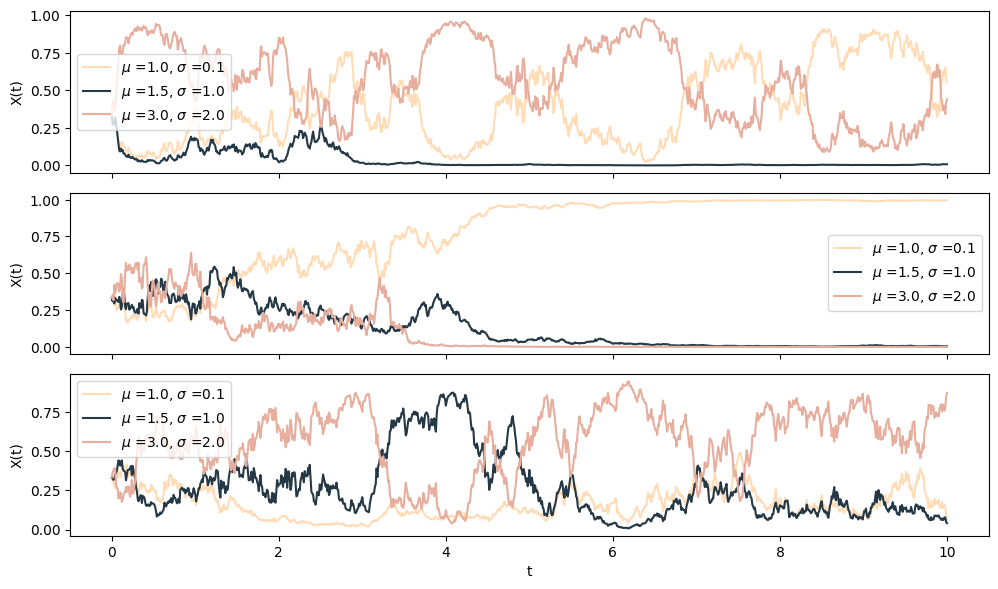

In [4]:
samples = 3
n = 3
mu = np.ones(n)
sigma = np.array([0.1,1.0,2.0])

res = p.white_replicator(10,0.001,N=3,sigma=sigma,samples=samples,gap=10)
t = res["t"]
X = res["X"]

leg=[r"$\mu$ ="+f'{x:.1f}'+r", $\sigma$ ="+f'{y:.1f}' for (x,y) in zip(res["mu"],res["sigma"])]

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i,x in enumerate(X):
    ax[i].plot(t,x)    
    ax[i].set_ylabel("X(t)")
    ax[i].legend(leg)
ax[-1].set_xlabel("t")
fig.tight_layout()
plt.show()

## two populations, many realizations

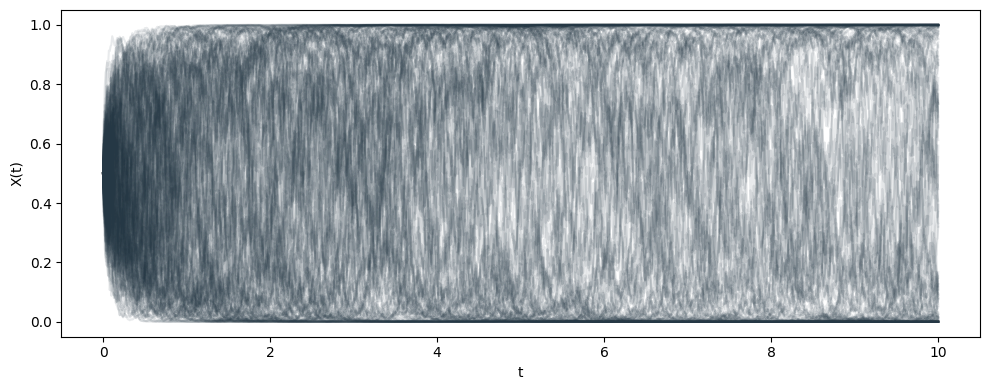

In [5]:
T = 10
samples = 200
N = 2
sigma = 2

res = p.white_replicator(T,0.001,N=N,sigma=sigma,samples=samples,gap=10)
t = res["t"]
X = res["X"][:,:,0]

fig,ax = plt.subplots(1,1,figsize=[10,4])

for x in X:
    ax.plot(t,x,color="C1",alpha=0.1)
    ax.set_xlabel("t")
    ax.set_ylabel("X(t)")

plt.tight_layout()
plt.show()



## here's an example with non-trivial covariance

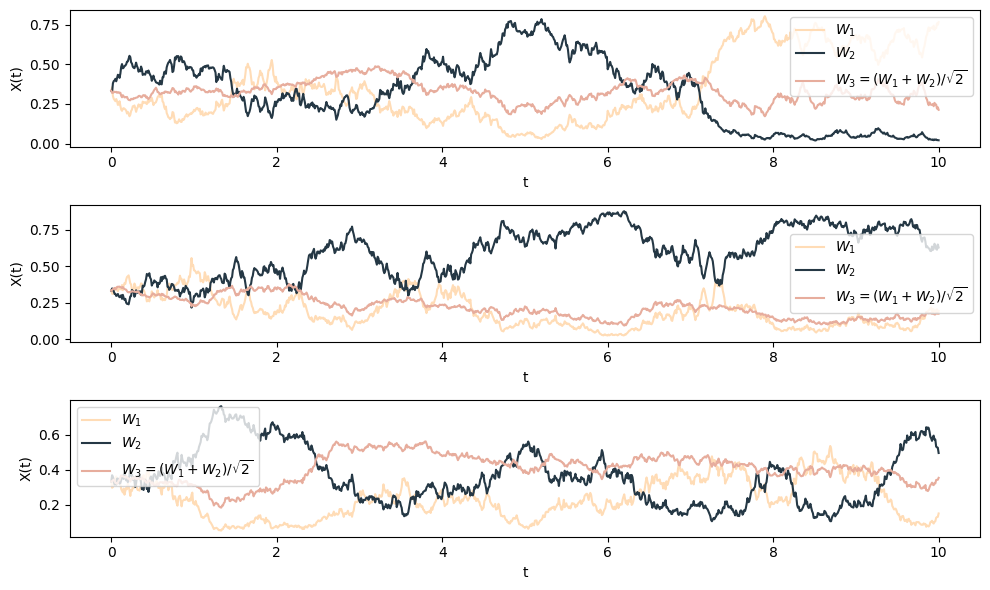

In [6]:
a = 1.0/np.sqrt(2)
cov = np.array([[1,0,a],[0,1,a],[a,a,1]])

samples = 3
N = 3


res = p.white_replicator(10,0.001,N=N,covariance=cov,samples=samples,gap=10)
t = res["t"]
X = res["X"]

leg=[r"$W_1$",r"$W_2$",r"$W_3=(W_1+W_2)/\sqrt{2}$"]

fig,ax = plt.subplots(samples,1,figsize=[10,6])
for i,x in enumerate(X):
    ax[i].plot(t,x)
    ax[i].set_xlabel("t")
    ax[i].set_ylabel("X(t)")
    ax[i].legend(leg)
ax[-1].set_xlabel("t")
fig.tight_layout()
plt.show()
